In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = []

In [52]:
# update the data.csv file with new logs
import re
import os
from pathlib import Path

files = Path('.').glob("*.log")
data = []
if not os.path.isfile('./data.csv'):
    print("[LOG] reading all log files")
    for f in files:
        if not re.match(r".+\d{4}\.log$", f.name):
            continue
        with f.open() as log:
            text = f.read_text()
            corr = len(re.findall("Correction ->", text))
            forw = len(re.findall("Forward ->", text))
            succ = len(re.findall("Successor \|\|", text))
            init = len(re.findall("init", text))
            data.append([corr, forw, succ, init])

    df = pd.DataFrame(
        data, columns=['Correction', 'Forward', 'Successor', 'init'])
    df.to_csv('data.csv')
else:
    df = pd.read_csv('./data.csv')

In [28]:
# upperbound for the messages count

print(df['Forward'].sum() + df['Correction'].sum()
,df['init'].sum() * 3 * 16)

85661 163248


<AxesSubplot:>

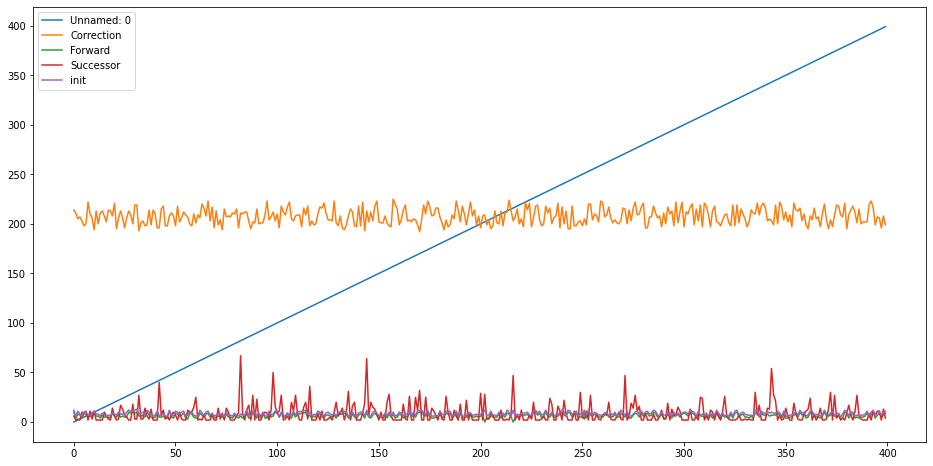

In [29]:
df.plot(figsize=(16,8))

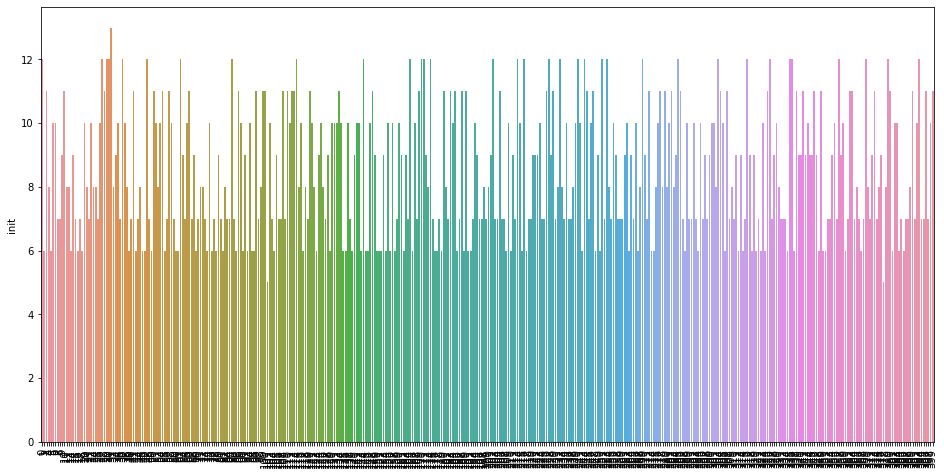

In [30]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x=df.index, y=df['init'])
ax.set_xticklabels(df.index, rotation=90)
plt.show()

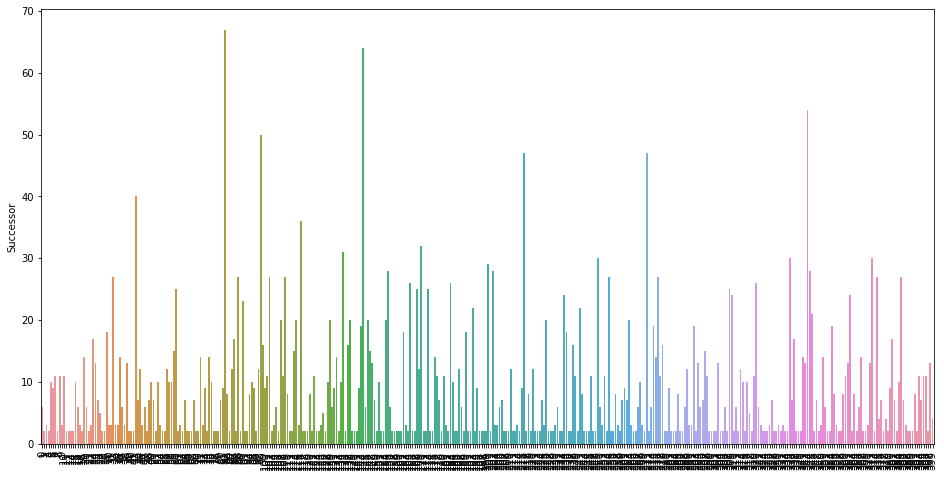

In [31]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x=df.index, y=df['Successor'])
ax.set_xticklabels(df.index, rotation=90)
plt.show()

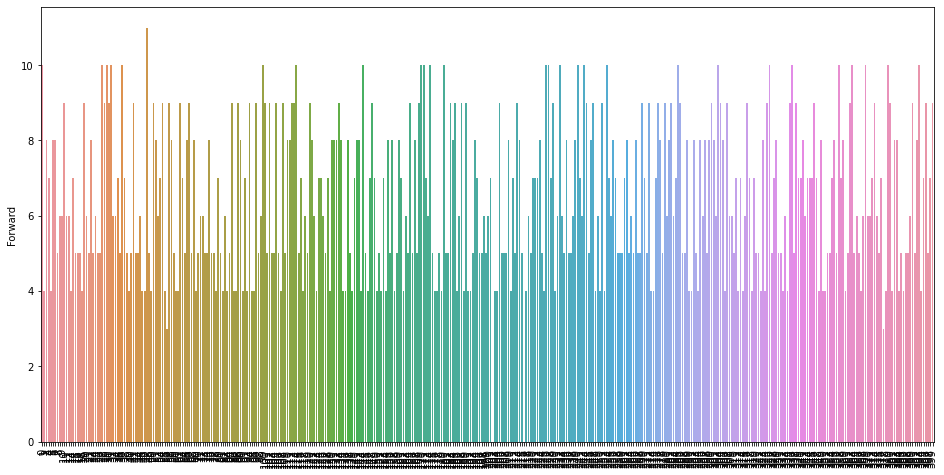

In [32]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x=df.index, y=df['Forward'])
ax.set_xticklabels(df.index, rotation=90)
plt.show()

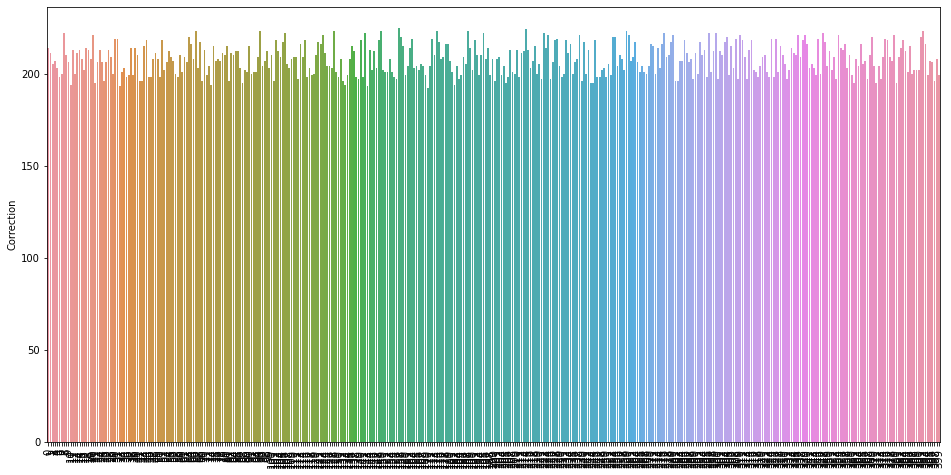

In [33]:
plt.figure(figsize=(16,8))
ax = sns.barplot(x=df.index, y=df['Correction'])
ax.set_xticklabels(df.index, rotation=90)
plt.show()

<AxesSubplot:xlabel='Correction', ylabel='Forward'>

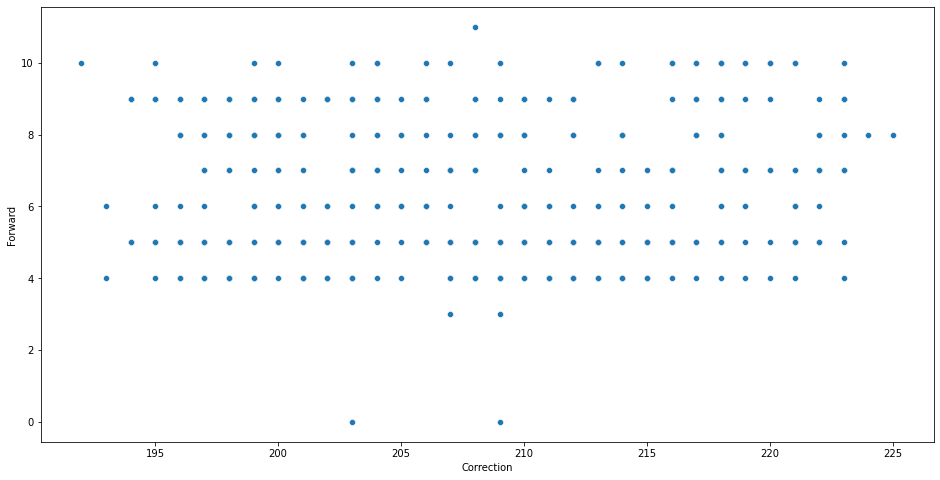

In [35]:
plt.figure(figsize=(16,8))

sns.scatterplot(x=df['Correction'], y=df['Forward'])

<AxesSubplot:xlabel='init', ylabel='Successor'>

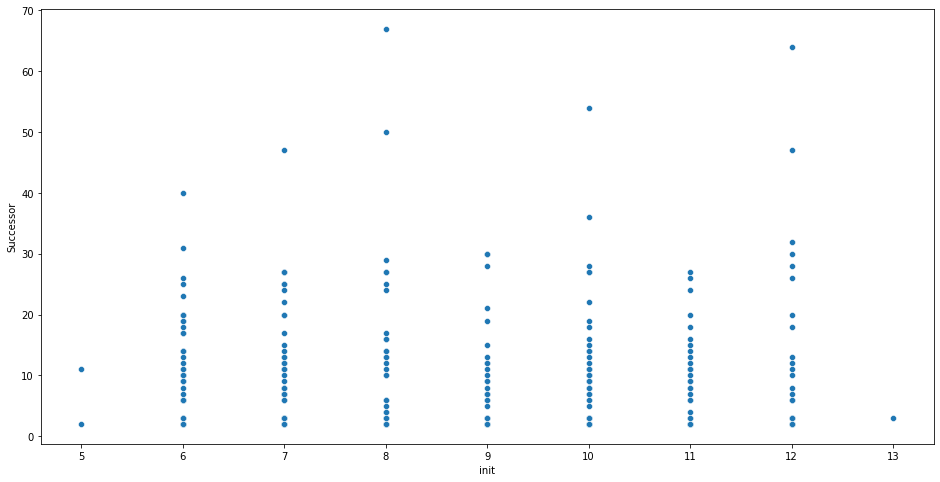

In [36]:
plt.figure(figsize=(16,8))

sns.scatterplot(x=df['init'], y=df['Successor'])


## The algorthim still skews the long jumps

- increase the number of the D Pointers in each node
- select the longest jump when forwarding to speed up the lookup algorithm

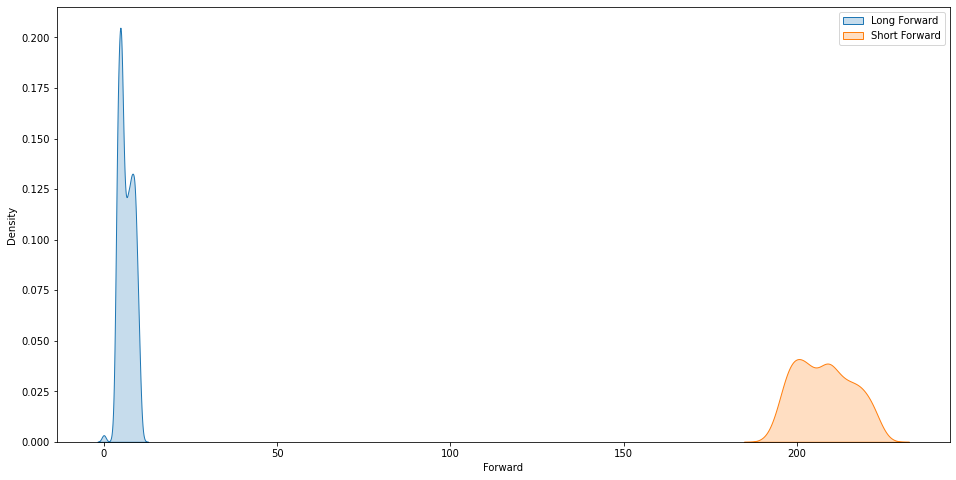

In [37]:
plt.figure(figsize=(16,8))

sns.kdeplot(data=df['Forward'], label="Long Forward", shade=True)
sns.kdeplot(data=df['Correction'], label="Short Forward", shade=True)

plt.legend()

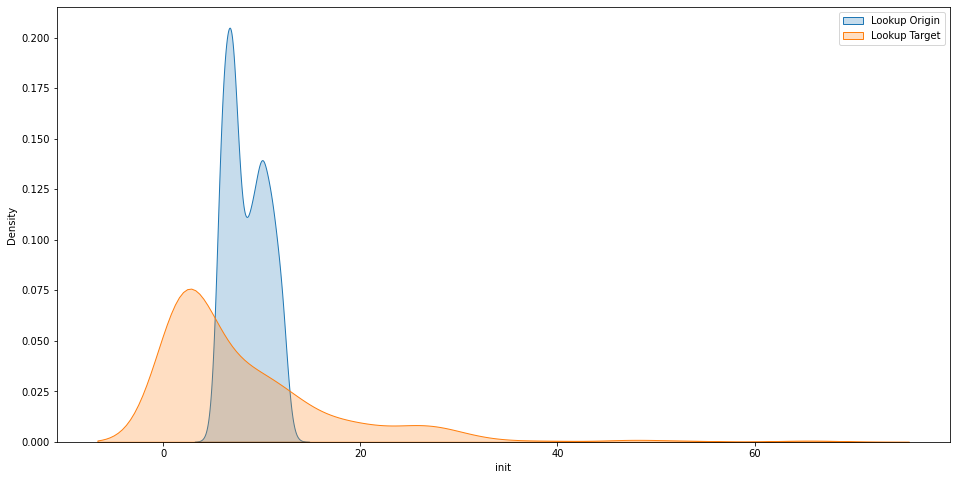

In [38]:
plt.figure(figsize=(16,8))

sns.kdeplot(data=df['init'], label="Lookup Origin", shade=True)
sns.kdeplot(data=df['Successor'], label="Lookup Target", shade=True)

plt.legend()
# what a surprise !!

In [47]:
# get the dealy for each request
import re
import os

delay_df = None
if not os.path.isfile('./delay.csv'):
    print('[log] read log file')
    with open("./log_out_400.log") as log:
        text = log.read()
        print(re.findall(r"hi in (\d+(\.\d+)?)ms", text))
        times = map(lambda x: float(x[0]), re.findall(r"hi in (\d+(\.\d+)?)ms", text))
        delay_df = pd.DataFrame(times, columns=['delay'])
#         delay_df.to_csv('delay.csv')
else:
    delay_df = pd.read_csv('delay.csv')
delay_df.describe()

[log] read log file
[('8.123072', '.123072'), ('19.789008', '.789008'), ('26.392022', '.392022'), ('26.49182', '.49182'), ('26.568734', '.568734'), ('26.517663', '.517663'), ('35.31061', '.31061'), ('35.413129', '.413129'), ('35.45972', '.45972'), ('36.169356', '.169356'), ('36.267829', '.267829'), ('37.095102', '.095102'), ('37.370194', '.370194'), ('37.403356', '.403356'), ('38.381824', '.381824'), ('38.665755', '.665755')]


,delay
count,16.000000
mean,31.338700
std,8.457326
min,8.123072
25%,26.511202
50%,35.436425
75%,37.163875
max,38.665755


<AxesSubplot:>

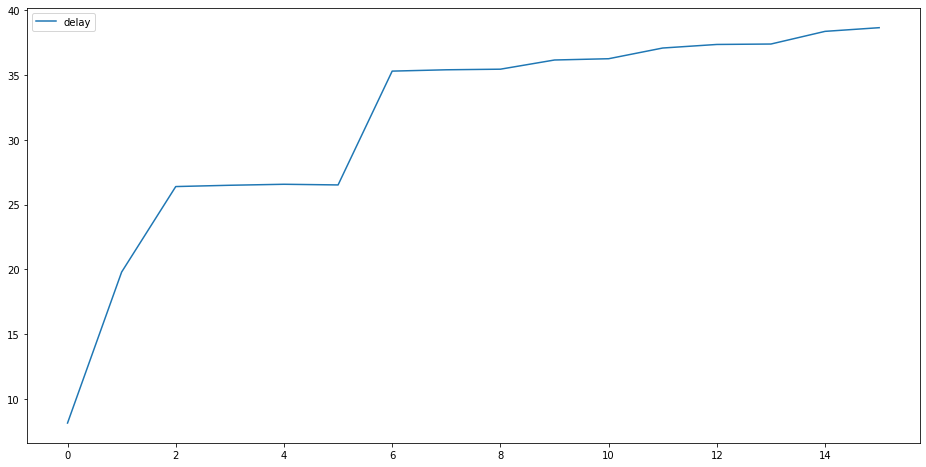

In [48]:
delay_df.plot(figsize=(16,8))

In [49]:
# variant tests
total_delays = []
for i in range(10,205,5):
    with open(f'log_out_{i}.log') as f:
        lines = f.readlines()
        d = float(re.findall(r".+ (\d+(\.\d+)?)ms$", lines[-1])[0][0])
        total_delays.append([i,d])
        
tdelays_df = pd.DataFrame(total_delays, columns=['node number','delay'])
tdelays_df.describe()
tdelays_df

,node number,delay
0,10,7.208426
1,15,9.954640
2,20,14.041230
3,25,14.073041
4,30,21.578648
5,35,18.905717
6,40,23.141560
7,45,25.937380
8,50,25.008312
9,55,26.581063


<AxesSubplot:>

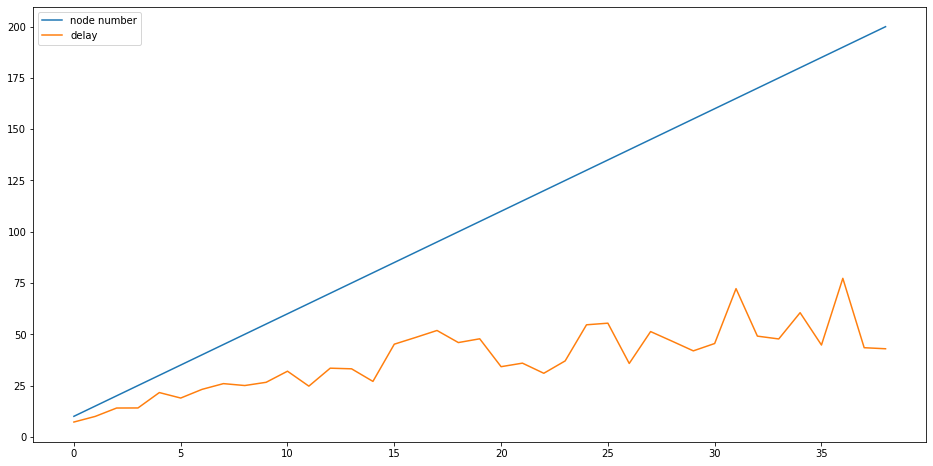

In [50]:
tdelays_df.plot(figsize=(16,8))

/tmp/ipykernel_103102/2166835024.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tdelays_df['node number'], rotation=90)


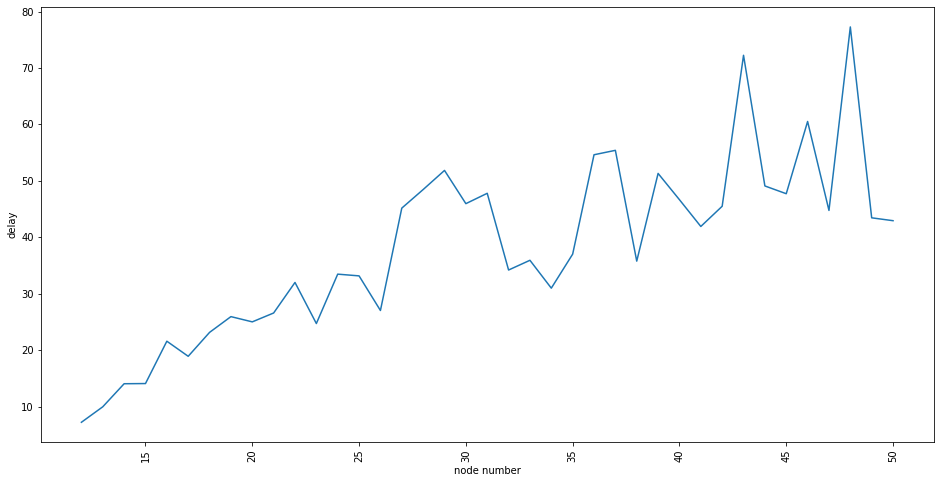

In [51]:
plt.figure(figsize=(16,8))
ax = sns.lineplot(x=tdelays_df['node number'], y=tdelays_df['delay'])
ax.set_xticklabels(tdelays_df['node number'], rotation=90)
plt.show()

<AxesSubplot:>

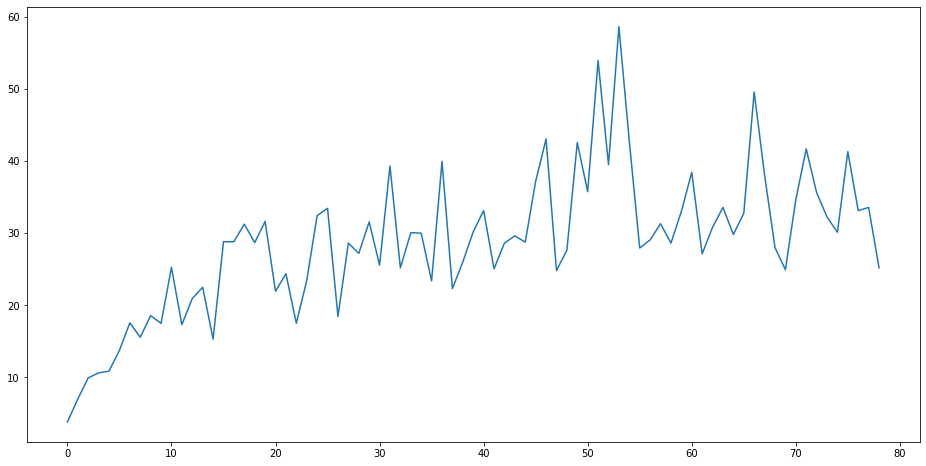

In [61]:
x = []
files = list(Path('.').glob('log_out_*.log'))

for f in files:
    text = f.read_text()
    res = re.findall(r'distance (\d+)', text)
    res = list(map(int, res))
    x.append(sum(res)/len(res))

y = list(range(10,405,5))
d = zip(y,x)

x_df = pd.DataFrame(d, columns=['node num', 'PL'])
x_df["PL"].plot(figsize=(16,8))

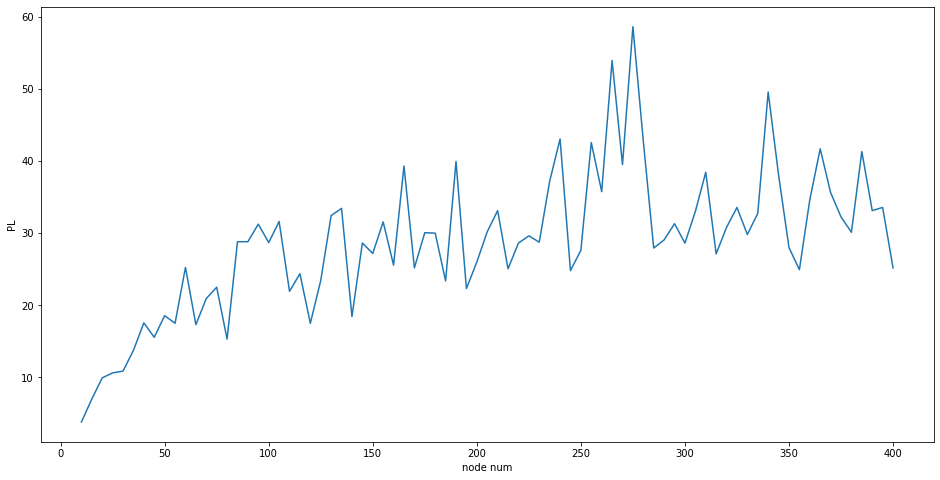

In [59]:
plt.figure(figsize=(16,8))
sns.lineplot(x=x_df['node num'], y=x_df['PL'])
plt.show()

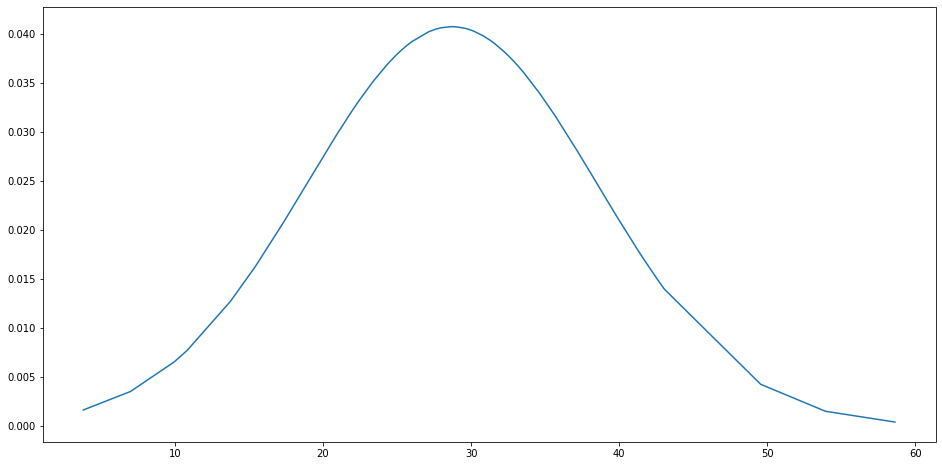

In [60]:
import numpy as np
from scipy import stats

x_df.sort_values(by=["PL"], inplace=True)
mean = np.mean(x_df["PL"])
std = np.std(x_df["PL"])
pdf = stats.norm.pdf(x_df["PL"], mean, std)

plt.figure(figsize=(16,8))
plt.plot(x_df["PL"], pdf)